#The goal was to replicate this a network in the below paper 


https://arxiv.org/pdf/1802.03268.pdf

## Design Approach 

*   Dataset used CIFAR 10
*   Keras functional API used for merge and skip connections
*   For skip connections across maxpooling - used conv 2x2 using stride of 2.This is done to enable same size channel size for concatenation. If the skip is across 2 maxpooling - 4x4 conv with stride of 4 was used.
*   Batch Normalization and Relu was enabled via function apis after each layer (except the last layer)

##Observations and Learning


*  For a fairly deep network , the numer of parameters was still not very large < 0.5 MM
*  Overfitting observed.
*  Validation loss kept increasing and fluctuated
*  With epochs = 100. Validation accuracy of 78.05%.







In [0]:
# Imports
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Input, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D,DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,Concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# CIFAR dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


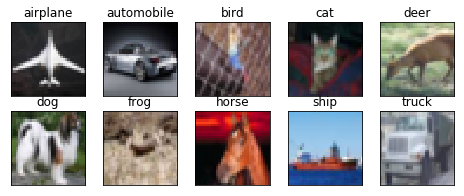

In [0]:
# Show the class names

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Function for plotting validation and training accuracy

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Design Approach
The below architecture was used

> Functional API approach was used for enabling merger and skip connections 

> Concatenate was used for the merge

> For skip connections across maxpooling - used conv 2x2 using stride of 2 . This is done 
to enable same size channel size for concatenation. If the skip is across 2 maxpooling - 4x4 conv with stride of 4 was used.

> Batch Normalization and Relu was enabled via function apis after each layer (except the last layer)

## Please refer to comments in code and observations & learning after the code

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:156: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (8, 8))`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 32, 32, 32)   203         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 32)   128         separable_conv2d_1[0][0]         
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

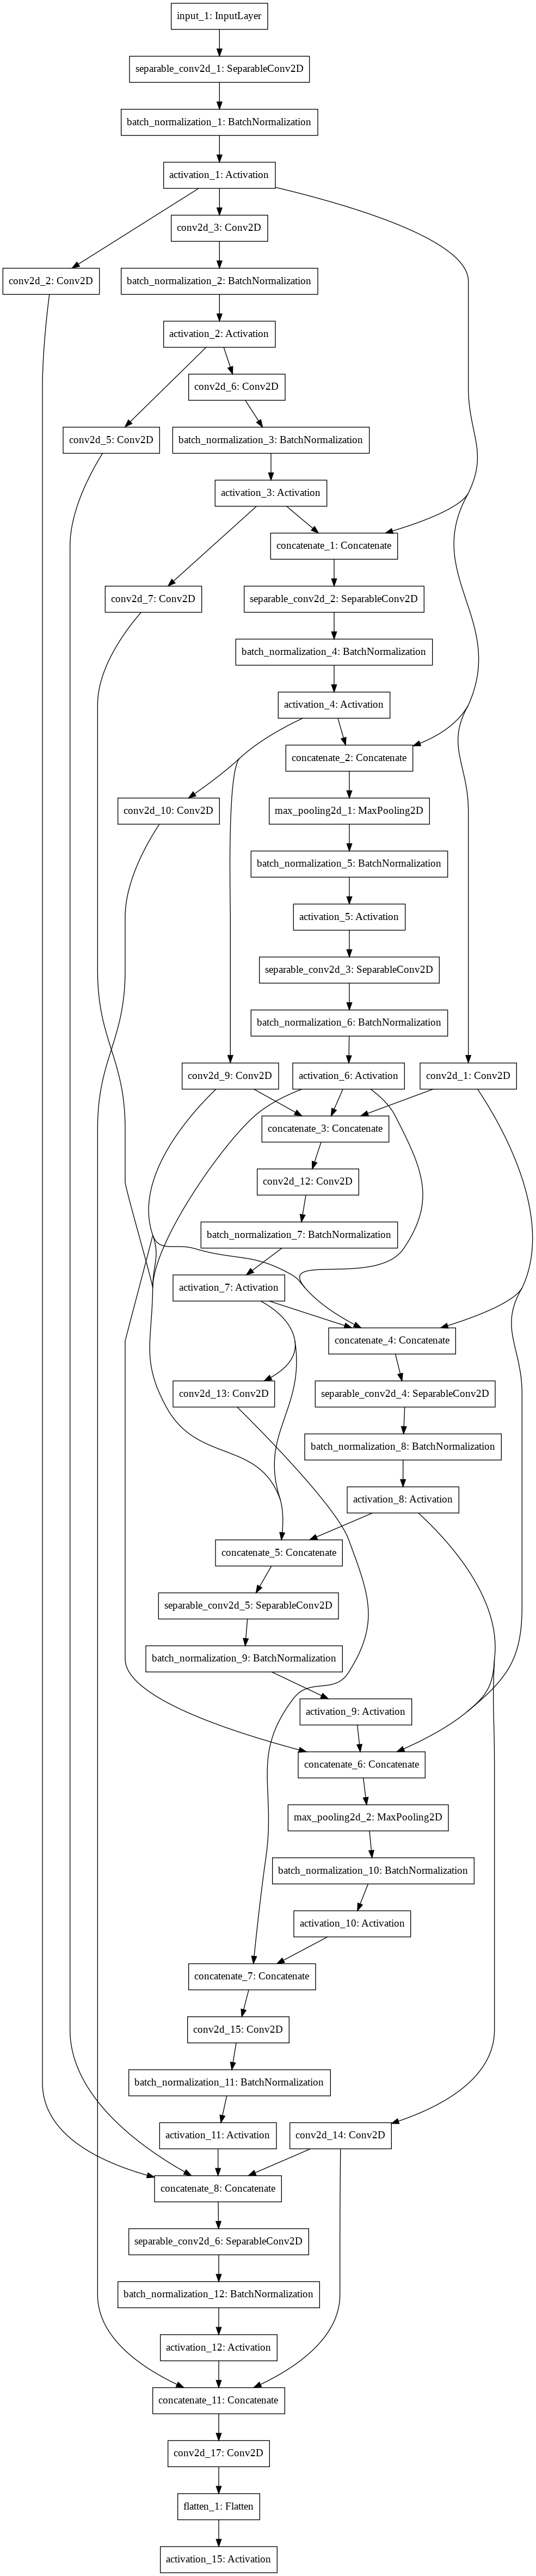

In [0]:
## MAIN BLOCK

from keras.layers import Activation
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import SeparableConv2D
from keras.layers import Add
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Concatenate
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization



x1 = Input(shape=(32, 32, 3))

# 5x5 depthwise convolution
x2 = SeparableConv2D(32,5,padding = 'same')(x1)
x2a = BatchNormalization()(x2)
x2b = Activation('relu')(x2a)

x2half = Conv2D(32, (2, 2),strides= (2,2))(x2b)
x2quarter = Conv2D(32, (4, 4),strides= (4,4))(x2b)


# 5x5 convolution
x3 = Conv2D(32, (5, 5), padding="same")(x2b)
x3a = BatchNormalization()(x3)
x3b = Activation('relu')(x3a)

x3half = Conv2D(32, (2, 2),strides= (2,2))(x3b)
x3quarter = Conv2D(32, (4, 4),strides= (4,4))(x3b)

# 5x5 convolution
x4 = Conv2D(32, (5, 5), padding="same")(x3b)
x4a = BatchNormalization()(x4)
x4b = Activation('relu')(x4a)

x4half = Conv2D(32, (2, 2),strides= (2,2))(x4b)
x4quarter = Conv2D(32, (4, 4),strides= (4,4))(x4b)

# x2b + x4b
x2x4add = Concatenate()([x2b, x4b])

# 5x5 depthwise convolution
x5 = SeparableConv2D(32,5,padding = 'same')(x2x4add)
x5a = BatchNormalization()(x5)
x5b = Activation('relu')(x5a)

x5half = Conv2D(32, (2, 2),strides= (2,2))(x5b)
x5quarter = Conv2D(32, (4, 4),strides= (4,4))(x5b)

# x2b + x5b
x2x5add = Concatenate()([x2b, x5b])

# Maxpooling
x6 = MaxPooling2D(pool_size=(2, 2)
                 )(x2x5add)
x6a = BatchNormalization()(x6)
x6b = Activation('relu')(x6a)


# 3x3 depthwise convolution
x7 = SeparableConv2D(32,3,padding = 'same')(x6b)
x7a = BatchNormalization()(x7)
x7b = Activation('relu')(x7a)

x7half = Conv2D(32, (2, 2),strides= (2,2))(x7b)

# x2b + x5b + x7b
# reduce channel size


x2x5x7add = Concatenate()([x2half, x5half,x7b])


# 5x5 convolution
x8 = Conv2D(32, (5, 5), padding="same")(x2x5x7add)
x8a = BatchNormalization()(x8)
x8b = Activation('relu')(x8a)

x8half = Conv2D(32, (2, 2),strides= (2,2))(x8b)

# x8b + x5b + x7b
# reduce channel size

x2x4x7x8add = Concatenate()([x2half,x5half, x7b,x8b])


# 3x3 depthwise convolution
x9 = SeparableConv2D(32,3,padding = 'same')(x2x4x7x8add)
x9a = BatchNormalization()(x9)
x9b = Activation('relu')(x9a)

x9half = Conv2D(32, (2, 2),strides= (2,2))(x9b)

# x7 + x8 + x9 + x4+ x5

x4x5x7x8x9add = Concatenate()([x4half,x5half, x7b,x8b, x9b])
# 5x5 depthwise convolution
x10 = SeparableConv2D(32,5,padding = 'same')(x4x5x7x8x9add)
x10a = BatchNormalization()(x10)
x10b = Activation('relu')(x10a)


# x10+ x9 + x2 + x5

x2x5x9x10add = Concatenate()([x2half, x5half, x9b , x10b])

# Maxpooling
x11 = MaxPooling2D(pool_size=(2, 2))(x2x5x9x10add)
x11a = BatchNormalization()(x11)
x11b = Activation('relu')(x11a)

# x8+ x11
x8x11add = Concatenate()([x8half, x11b])


# 5x5 convolution
x12 = Conv2D(32, (5, 5), padding="same")(x8x11add)
x12a = BatchNormalization()(x12)
x12b = Activation('relu')(x12a)

# x2+ x3 + x9 + x12
x2x3x9x12add = Concatenate()([x2quarter,x3quarter,x9half,x12b])

# 5x5 depthwise convolution
x13 = SeparableConv2D(32,5,padding = 'same')(x2x3x9x12add)
x13a = BatchNormalization()(x13)
x13b = Activation('relu')(x13a)


# x3+ x4 + x7 + x12 + x13
x3x4x7x12x13add = Concatenate()([x3quarter,x4quarter,x7half,x12b,x13b])

# 3x3 convolution
x14 = Conv2D(32, (3, 3), padding="same")(x3x4x7x12x13add)
x14a = BatchNormalization()(x14)
x14b = Activation('relu')(x14a)


# x2+ x5 + x7 + x13 + x14
x2x5x7x13x14add = Concatenate()([x2quarter,x5quarter,x7half,x12b,x13b])


# 5x5 depthwise convolution
x15 = SeparableConv2D(32,5,padding = 'same')(x2x5x7x13x14add)
x15a = BatchNormalization()(x15)
x15b = Activation('relu')(x15a)

# x5+ x9 x13
x5x9x13add = Concatenate()([x5quarter,x9half,x13b])
x16 = Convolution2D(10, 8,8)(x5x9x13add)
#x16a = BatchNormalization()(x16)
#x16b = Activation('relu')(x16b)
flat = Flatten()(x16)


output_final = Activation('softmax')(flat)
model = Model(inputs=x1, outputs=[output_final])

model.summary()
plot_model(model)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  


Epoch 1/100
390/390 [==============================] - 29s 75ms/step - loss: 1.3549 - acc: 0.5263 - val_loss: 1.4882 - val_acc: 0.4920
Epoch 2/100
390/390 [==============================] - 24s 61ms/step - loss: 0.9476 - acc: 0.6689 - val_loss: 1.2466 - val_acc: 0.6178
Epoch 3/100
390/390 [==============================] - 24s 61ms/step - loss: 0.7835 - acc: 0.7258 - val_loss: 1.0504 - val_acc: 0.6484
Epoch 4/100
390/390 [==============================] - 24s 60ms/step - loss: 0.6753 - acc: 0.7640 - val_loss: 0.9516 - val_acc: 0.6918
Epoch 5/100
390/390 [==============================] - 24s 60ms/step - loss: 0.6002 - acc: 0.7884 - val_loss: 0.9375 - val_acc: 0.7081
Epoch 6/100
390/390 [==============================] - 24s 61ms/step - loss: 0.5429 - acc: 0.8128 - val_loss: 0.8001 - val_acc: 0.7391
Epoch 7/100
390/390 [==============================] - 24s 60ms/step - loss: 0.4841 - acc: 0.8308 - val_loss: 0.9090 - val_acc: 0.7007
Epoch 8/100
390/390 [==============================] - 

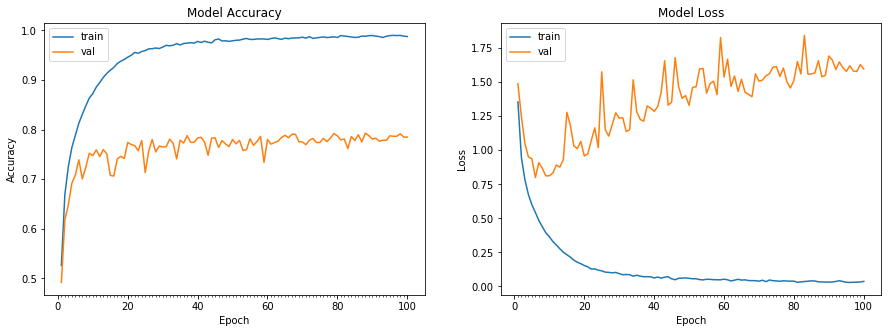

Accuracy on test data is: 78.50


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


## Observations and Learning

* For a fairly deep network , the numer of parameters was still not very large < 0.5 MM

* Overfitting observed. 

* Validation loss kept increasing and fluctuated 

* With epochs = 100. **Validation accuracy of 78.05%**.
